In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [15]:
# Load your time series data
data = pd.read_csv('/content/monthly-beer-production-in-austr.csv')

# Handle non-numeric values in the 'Monthly beer production' column
data['Monthly beer production'] = pd.to_numeric(data['Monthly beer production'], errors='coerce')
data = data.dropna()  # Drop rows with non-numeric values

# Reshape the time series data
time_series = data['Monthly beer production'].values.reshape(-1, 1)


In [16]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series)

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # You can experiment with the number of time steps
X, y = create_dataset(scaled_data, time_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)



Epoch 1/50
15/15 [==============================] - 4s 11ms/step - loss: 0.0958
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0268
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0235
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 5/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0213
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0208
Epoch 8/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0210
Epoch 9/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 10/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 11/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 12/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0202
Epoch 13/50
15/15 [==================

In [18]:
# Make predictions on future values
future_time_steps = 100  # You can adjust this based on how many future values you want to predict

1/1 [==============================] - 0s 34ms/step


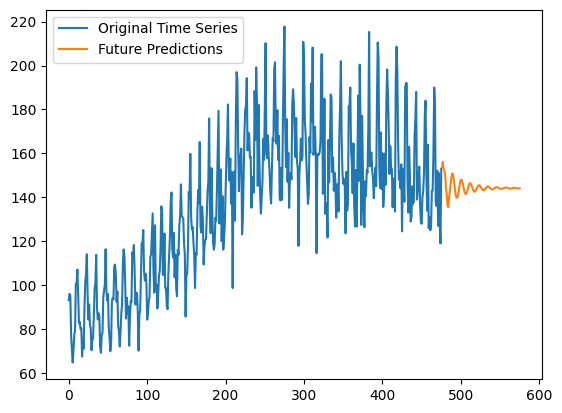

In [19]:
# Use the last 'time_steps' data points from the training data to predict future values
input_data = scaled_data[-time_steps:]
input_data = np.reshape(input_data, (1, time_steps, 1))

future_predictions = []

for i in range(future_time_steps):
    predicted_value = model.predict(input_data)[0, 0]
    future_predictions.append(predicted_value)
    input_data = np.roll(input_data, -1)
    input_data[0, -1, 0] = predicted_value

# Inverse transform the predictions to the original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Plot the original time series and the predicted future values
plt.plot(time_series, label='Original Time Series')
plt.plot(np.arange(len(time_series), len(time_series) + future_time_steps), future_predictions, label='Future Predictions')
plt.legend()
plt.show()